In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

class Point2D:
    """
    Class with the methods needed
    """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return f'({self.x}, {self.y})'
    
    def __repr__(self):
        return f'({self.x}, {self.y})'
    
    def dist_to(self, point):
        """
        Euclidean distance to a point
        """
        return np.sqrt((self.x - point.x)**2 + (self.y - point.y)**2)
    
    def draw_point(self):
        plt.scatter(self.x, self.y, color='r', s=1)
    
    def draw_line_to(self, point):
        """
        The method to draw a line between two points.
        """
        x = np.linspace(self.x, point.x, 50)
        try:
            k = (point.y - self.y)/(point.x - self.x)
            y = k * x + (self.y - k * self.x)
            plt.plot(x,y, color='k')
        except ZeroDivisionError:
            y = np.linspace(self.y, point.y, 50)
            plt.plot(x,y,color='k')
    
    def draw_circle(self, r):
        """
        The method to draw a circle of radius r centered at the current point
        """
        x = list(np.linspace(self.x - r, self.x + r, 100))
        y = [np.sqrt(r**2 - (i-self.x)**2) + self.y for i in x]
        y_m = [2*self.y - i for i in y]
        plt.plot(x,y,color='r')
        plt.plot(x,y_m,color='r')
    
    def draw_circles_without_intersection(self, r, *point_list):
        """
        The method to draw multiple circles out of all given points, but circles
        don't intersect
        """
        count = 0
        x_up = list(np.linspace(self.x - r, self.x + r, 100))
        y_up = [np.sqrt(r**2 - (i-self.x)**2) + self.y for i in x_up]
        x_down = x_up
        y_down = [2*self.y - i for i in y_up]
        
        # upper half of a circle
        xy = []
        x_draw = []
        y_draw = []
        xy.append(x_up)
        xy.append(y_up)
        for i in range(len(x_up)):
            for p in point_list:
                if Point2D(xy[0][i], xy[1][i]).dist_to(p) >= r:
                    count += 1
            # if a point on a circle doesn't lie inside of any other circles,
            # it's allowed to be drawn
            if count == len(point_list):
                x_draw.append(xy[0][i]) 
                y_draw.append(xy[1][i])
            count = 0
        plt.scatter(x_draw, y_draw, color='r', s=1)
        
        # bottom half of a circle
        xy = []
        x_draw = []
        y_draw = []
        xy.append(x_down)
        xy.append(y_down)
        for i in range(len(x_down)):
            for p in point_list:
                if Point2D(xy[0][i], xy[1][i]).dist_to(p) >= r:
                    count += 1
            if count == len(point_list):
                x_draw.append(xy[0][i]) 
                y_draw.append(xy[1][i])
            count = 0
        plt.scatter(x_draw, y_draw, color='r', s=1)
        
        
def animate_circles(x):
    """
    The function to animate circles with intersections
    """
    plt.gcf().clear()
    for i in range(len(point_list) - 1):
        point_list[i].draw_line_to(point_list[i + 1])
    for i in range((len(point_list))):
        point_list[i].draw_circle(x)           
    plt.show()
        
        
def animate_without_inters(x):
    """
    The function to animate circles without intersections
    """
    plt.gcf().clear()
    for i in range(len(point_list) - 1):
        point_list[i].draw_line_to(point_list[i + 1])
    for i in range((len(point_list))):
        point_list[i].draw_circles_without_intersection(x, *point_list)           
    plt.show()

In [2]:
# Enter coordinates of your points here
# The points will be connected with lines
# See the water circles animation as if the 
# resulting figure (empty inside) is thrown into liquid
point_list = [Point2D(0, 0), 
              Point2D(1, 0),
              Point2D(1, 1), 
              Point2D(0, 1),
              Point2D(0, 0)]

<IPython.core.display.Javascript object>


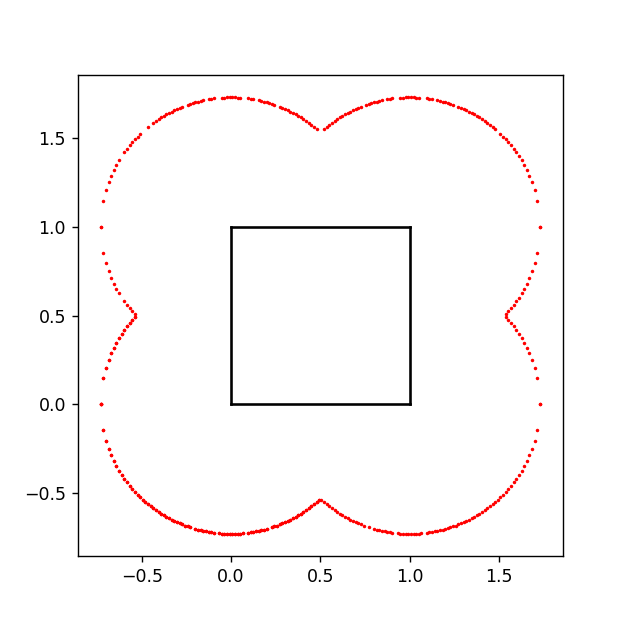

In [3]:
%matplotlib notebook

fig = plt.figure(figsize=(5,5))
step = 0.01
steps = np.arange(0, 20, step)
ani = FuncAnimation(fig, animate_without_inters, steps)
# ani = FuncAnimation(fig, animate_circles, steps)
plt.show()